In [737]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

In [738]:
data=pd.read_csv('hypothyroid.csv')

In [739]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [740]:
data.shape

(3772, 30)

In [741]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [742]:
data.duplicated().sum()

61

In [743]:
data=data.drop_duplicates()

In [744]:
data.shape

(3711, 30)

In [745]:
data.rename(columns={'binaryClass':'Outcome'},inplace=True)


In [746]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3711 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3711 non-null   object
 1   sex                        3711 non-null   object
 2   on thyroxine               3711 non-null   object
 3   query on thyroxine         3711 non-null   object
 4   on antithyroid medication  3711 non-null   object
 5   sick                       3711 non-null   object
 6   pregnant                   3711 non-null   object
 7   thyroid surgery            3711 non-null   object
 8   I131 treatment             3711 non-null   object
 9   query hypothyroid          3711 non-null   object
 10  query hyperthyroid         3711 non-null   object
 11  lithium                    3711 non-null   object
 12  goitre                     3711 non-null   object
 13  tumor                      3711 non-null   object
 14  hypopituitary

In [747]:
data['Outcome'].unique()

array(['P', 'N'], dtype=object)

In [748]:
data=data.drop(['TSH measured','T3 measured','TT4 measured','T4U measured','TT4 measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1) 

In [749]:
data

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Outcome
0,41,F,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,P
1,23,F,f,f,f,f,f,f,f,4.1,2,102,?,?,P
2,46,M,f,f,f,f,f,f,f,0.98,?,109,0.91,120,P
3,70,F,f,f,f,f,f,f,f,0.16,1.9,175,?,?,P
4,70,F,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,t,?,?,?,?,?,P
3768,68,F,f,f,f,f,f,f,f,1,2.1,124,1.08,114,P
3769,74,F,f,f,f,f,f,f,f,5.1,1.8,112,1.07,105,P
3770,72,M,f,f,f,f,f,f,f,0.7,2,82,0.94,87,P


In [750]:
data.replace('?',np.nan,inplace=True)

In [751]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3711 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3710 non-null   object
 1   sex              3562 non-null   object
 2   sick             3711 non-null   object
 3   pregnant         3711 non-null   object
 4   thyroid surgery  3711 non-null   object
 5   I131 treatment   3711 non-null   object
 6   lithium          3711 non-null   object
 7   goitre           3711 non-null   object
 8   tumor            3711 non-null   object
 9   TSH              3402 non-null   object
 10  T3               3002 non-null   object
 11  TT4              3540 non-null   object
 12  T4U              3384 non-null   object
 13  FTI              3386 non-null   object
 14  Outcome          3711 non-null   object
dtypes: object(15)
memory usage: 463.9+ KB


In [752]:
data.isnull().sum()

age                  1
sex                149
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                309
T3                 709
TT4                171
T4U                327
FTI                325
Outcome              0
dtype: int64

In [753]:
imputer=SimpleImputer(strategy='most_frequent')
data['age']=imputer.fit_transform(data[['age']]).ravel()
data['sex']=imputer.fit_transform(data[['sex']]).ravel()
                                  

In [754]:
impute=SimpleImputer(strategy='mean')
data['TSH']=impute.fit_transform(data[['TSH']]).ravel()
data['T3']=impute.fit_transform(data[['T3']]).ravel()
data['TT4']=impute.fit_transform(data[['TT4']]).ravel()
data['T4U']=impute.fit_transform(data[['T4U']]).ravel()
data['FTI']=impute.fit_transform(data[['FTI']]).ravel()



In [755]:
data.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Outcome            0
dtype: int64

In [756]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3711 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3711 non-null   object 
 1   sex              3711 non-null   object 
 2   sick             3711 non-null   object 
 3   pregnant         3711 non-null   object 
 4   thyroid surgery  3711 non-null   object 
 5   I131 treatment   3711 non-null   object 
 6   lithium          3711 non-null   object 
 7   goitre           3711 non-null   object 
 8   tumor            3711 non-null   object 
 9   TSH              3711 non-null   float64
 10  T3               3711 non-null   float64
 11  TT4              3711 non-null   float64
 12  T4U              3711 non-null   float64
 13  FTI              3711 non-null   float64
 14  Outcome          3711 non-null   object 
dtypes: float64(5), object(10)
memory usage: 463.9+ KB


In [757]:
data['age']=data['age'].astype(int)
data['TSH']=data['TSH'].astype(int)
data['T3']=data['T3'].astype(int)
data['TT4']=data['TT4'].astype(int)
data['T4U']=data['T4U'].astype(int)
data['FTI']=data['FTI'].astype(int)

In [758]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3711 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3711 non-null   int32 
 1   sex              3711 non-null   object
 2   sick             3711 non-null   object
 3   pregnant         3711 non-null   object
 4   thyroid surgery  3711 non-null   object
 5   I131 treatment   3711 non-null   object
 6   lithium          3711 non-null   object
 7   goitre           3711 non-null   object
 8   tumor            3711 non-null   object
 9   TSH              3711 non-null   int32 
 10  T3               3711 non-null   int32 
 11  TT4              3711 non-null   int32 
 12  T4U              3711 non-null   int32 
 13  FTI              3711 non-null   int32 
 14  Outcome          3711 non-null   object
dtypes: int32(6), object(9)
memory usage: 376.9+ KB


In [759]:
data.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Outcome
0,41,F,f,f,f,f,f,f,f,1,2,125,1,109,P
1,23,F,f,f,f,f,f,f,f,4,2,102,0,110,P
2,46,M,f,f,f,f,f,f,f,0,2,109,0,120,P
3,70,F,f,f,f,f,f,f,f,0,1,175,0,110,P
4,70,F,f,f,f,f,f,f,f,0,1,61,0,70,P


Text(0.5, 1.0, 'Age Distribution')

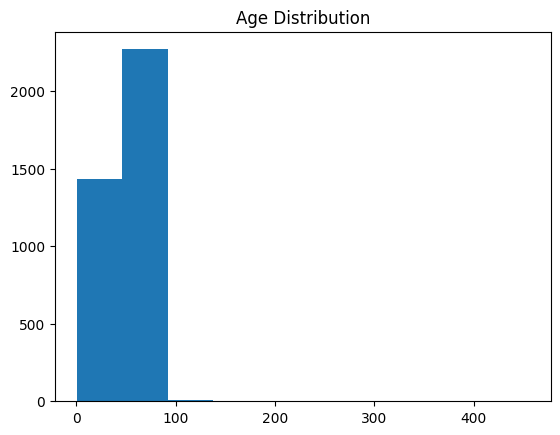

In [760]:
#analysis
plt.hist(data["age"])
plt.title("Age Distribution")

<Axes: xlabel='Outcome', ylabel='Count'>

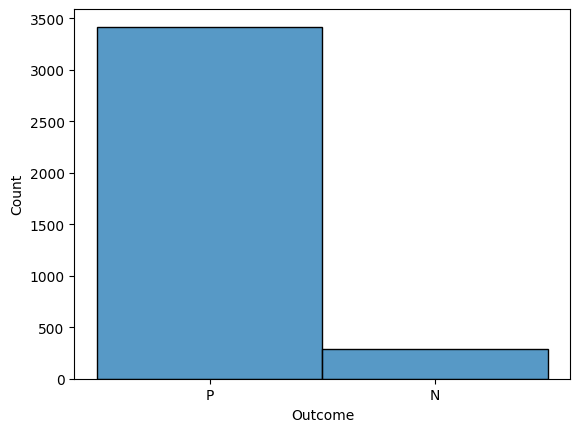

In [761]:
sns.histplot(data,x='Outcome')

<Axes: xlabel='age'>

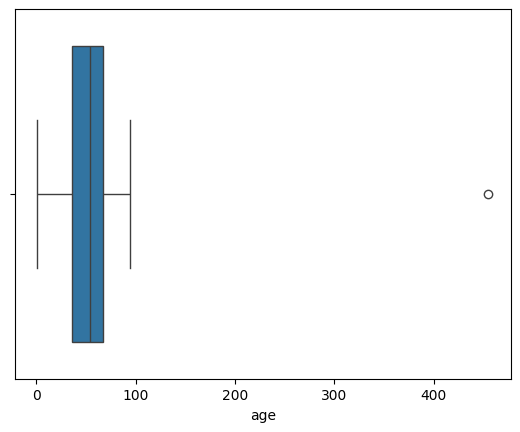

In [762]:
sns.boxplot(data,x='age')

<Axes: xlabel='TSH'>

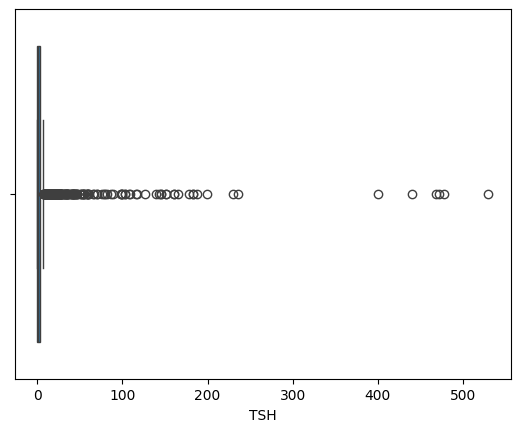

In [763]:

sns.boxplot(data,x='TSH')


<Axes: xlabel='TT4'>

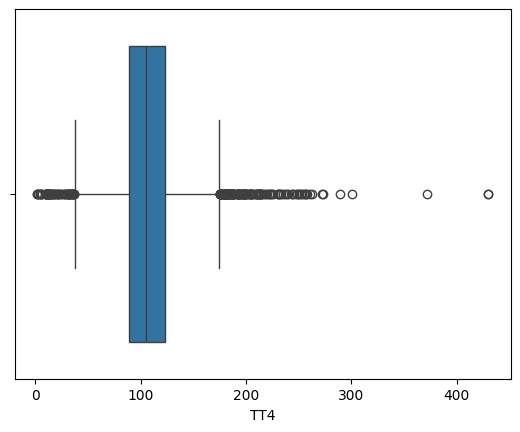

In [764]:
sns.boxplot(data,x='TT4')

<Axes: xlabel='T3'>

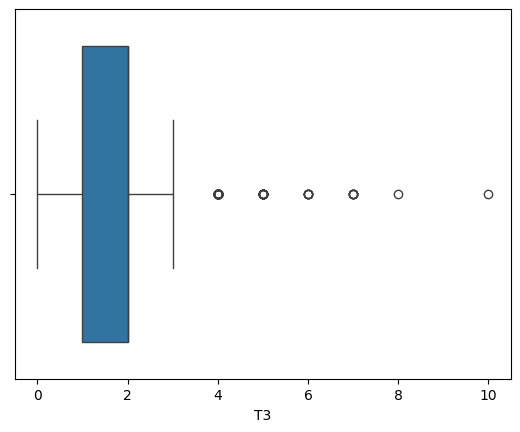

In [765]:
sns.boxplot(data,x='T3')

<Axes: xlabel='FTI'>

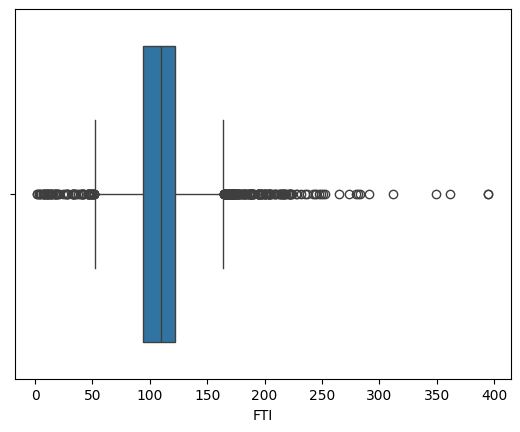

In [766]:
sns.boxplot(data,x='FTI')

<Axes: xlabel='T4U'>

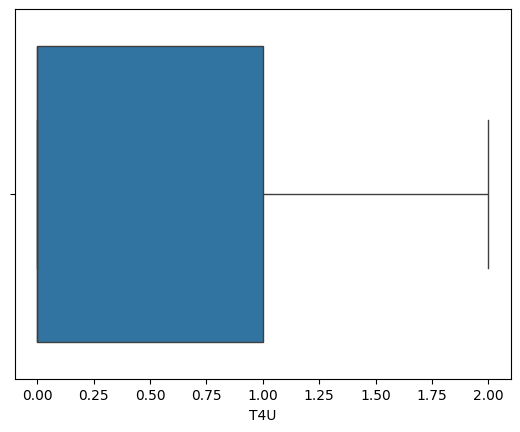

In [767]:
sns.boxplot(data,x='T4U')

In [768]:
q1=data['TSH'].quantile(.25)
q3=data['TSH'].quantile(.75)
iqr=q3-q1

lowerbound=q1+1.5*iqr
upperbound=q3+1.5*iqr
print(lowerbound)
print(upperbound)
data['TSH']=data['TSH'].apply(lambda x:lowerbound if x<lowerbound else upperbound if x>upperbound else x)

4.5
7.5


In [769]:
q1=data['TT4'].quantile(.25)
q3=data['TT4'].quantile(.75)
iqr=q3-q1

lowerbound=q1+1.5*iqr
upperbound=q3+1.5*iqr
print(lowerbound)
print(upperbound)
data['TT4']=data['TT4'].apply(lambda x:lowerbound if x<lowerbound else upperbound if x>upperbound else x)

q1=data['T3'].quantile(.25)
q3=data['T3'].quantile(.75)
iqr=q3-q1

lowerbound=q1+1.5*iqr
upperbound=q3+1.5*iqr
print(lowerbound)
print(upperbound)
data['T3']=data['T3'].apply(lambda x:lowerbound if x<lowerbound else upperbound if x>upperbound else x)

q1=data['T4U'].quantile(.25)
q3=data['T4U'].quantile(.75)
iqr=q3-q1

lowerbound=q1+1.5*iqr
upperbound=q3+1.5*iqr
print(lowerbound)
print(upperbound)
data['T4U']=data['T4U'].apply(lambda x:lowerbound if x<lowerbound else upperbound if x>upperbound else x)

140.0
174.0
2.5
3.5
1.5
2.5


<Axes: xlabel='Outcome', ylabel='age'>

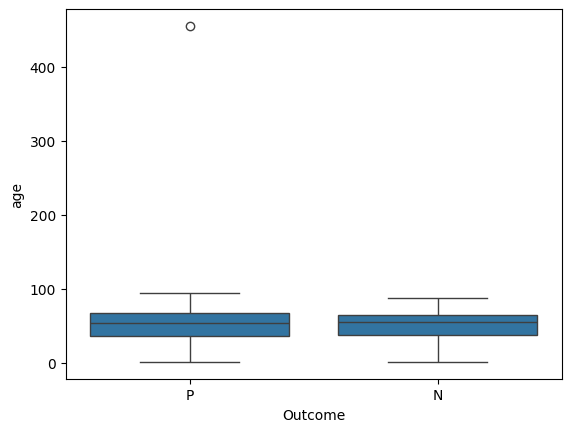

In [770]:
#bivariate analysis
sns.boxplot(data,x='Outcome',y='age')



q1=data['age'].quantile(.25)
q3=data['age'].quantile(.75)
iqr=q3-q1

lowerbound=q1+1.5*iqr
upperbound=q3+1.5*iqr
print(lowerbound)
print(upperbound)
data = data[(data['age'] >= lowerbound) & (data['age'] <= upperbound)]

In [771]:
##sns.boxplot(data,x='age')

<Axes: xlabel='sex', ylabel='age'>

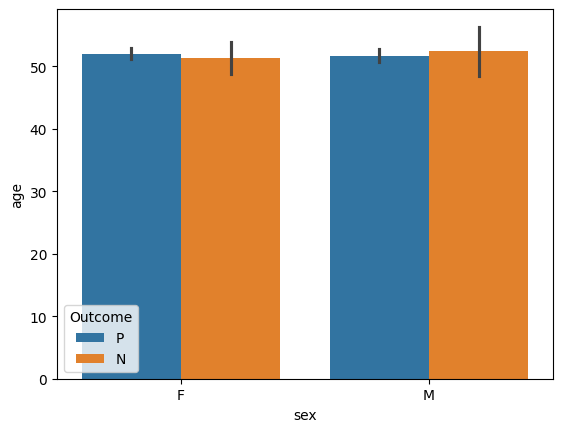

In [772]:
sns.barplot(data,x='sex',y='age',hue='Outcome')

<Axes: >

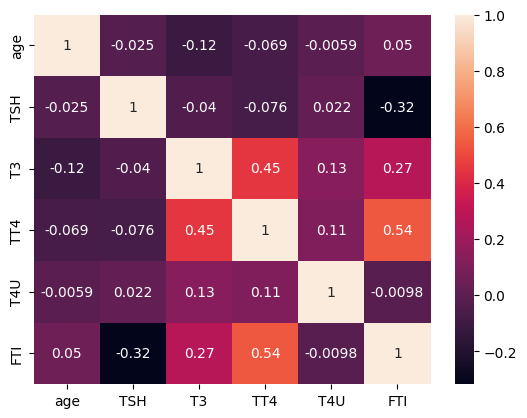

In [773]:
numeric_data=data.select_dtypes(include="number")
sns.heatmap(numeric_data.corr(),annot=True)

In [774]:
data

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Outcome
0,41,F,f,f,f,f,f,f,f,4.5,2.5,140.0,1.5,109,P
1,23,F,f,f,f,f,f,f,f,4.5,2.5,140.0,1.5,110,P
2,46,M,f,f,f,f,f,f,f,4.5,2.5,140.0,1.5,120,P
3,70,F,f,f,f,f,f,f,f,4.5,2.5,174.0,1.5,110,P
4,70,F,f,f,f,f,f,f,f,4.5,2.5,140.0,1.5,70,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,t,5.0,2.5,140.0,1.5,110,P
3768,68,F,f,f,f,f,f,f,f,4.5,2.5,140.0,1.5,114,P
3769,74,F,f,f,f,f,f,f,f,5.0,2.5,140.0,1.5,105,P
3770,72,M,f,f,f,f,f,f,f,4.5,2.5,140.0,1.5,87,P


In [775]:
#label encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()
data['sex']=labelencoder.fit_transform(data['sex'])
data['sick']=labelencoder.fit_transform(data['sick'])
data['pregnant']=labelencoder.fit_transform(data['pregnant'])
data['thyroid surgery']=labelencoder.fit_transform(data['thyroid surgery'])
data['I131 treatment']=labelencoder.fit_transform(data['I131 treatment'])
data['lithium']=labelencoder.fit_transform(data['lithium'])
data['goitre']=labelencoder.fit_transform(data['goitre'])
data['tumor']=labelencoder.fit_transform(data['tumor'])
data['Outcome']=labelencoder.fit_transform(data['Outcome'])


<Axes: >

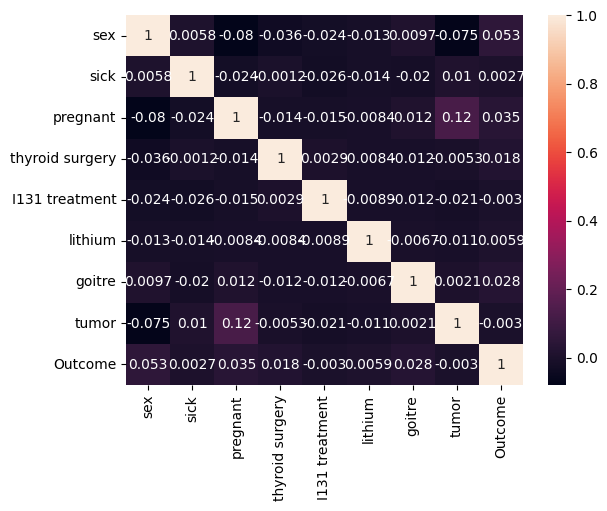

In [776]:
cat_features = ['sex', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'lithium', 'goitre', 'tumor','Outcome']

corr_matrix = data[cat_features].corr()

sns.heatmap(corr_matrix,annot=True)

In [777]:
##feature removal
data=data.drop(columns=['lithium'])

In [778]:
data

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,goitre,tumor,TSH,T3,TT4,T4U,FTI,Outcome
0,41,0,0,0,0,0,0,0,4.5,2.5,140.0,1.5,109,1
1,23,0,0,0,0,0,0,0,4.5,2.5,140.0,1.5,110,1
2,46,1,0,0,0,0,0,0,4.5,2.5,140.0,1.5,120,1
3,70,0,0,0,0,0,0,0,4.5,2.5,174.0,1.5,110,1
4,70,0,0,0,0,0,0,0,4.5,2.5,140.0,1.5,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,0,0,0,1,5.0,2.5,140.0,1.5,110,1
3768,68,0,0,0,0,0,0,0,4.5,2.5,140.0,1.5,114,1
3769,74,0,0,0,0,0,0,0,5.0,2.5,140.0,1.5,105,1
3770,72,1,0,0,0,0,0,0,4.5,2.5,140.0,1.5,87,1


In [779]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
minmax=MinMaxScaler()
data['TSH']=minmax.fit_transform(data[['TSH']])
data['T3']=minmax.fit_transform(data[['T3']])
data['TT4']=minmax.fit_transform(data[['TT4']])
data['FTI']=minmax.fit_transform(data[['FTI']])
data['T4U']=minmax.fit_transform(data[['FTI']])


In [780]:
data

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,goitre,tumor,TSH,T3,TT4,T4U,FTI,Outcome
0,41,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.272265,0.272265,1
1,23,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.274809,0.274809,1
2,46,1,0,0,0,0,0,0,0.000000,0.0,0.0,0.300254,0.300254,1
3,70,0,0,0,0,0,0,0,0.000000,0.0,1.0,0.274809,0.274809,1
4,70,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.173028,0.173028,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,0,0,0,1,0.166667,0.0,0.0,0.274809,0.274809,1
3768,68,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.284987,0.284987,1
3769,74,0,0,0,0,0,0,0,0.166667,0.0,0.0,0.262087,0.262087,1
3770,72,1,0,0,0,0,0,0,0.000000,0.0,0.0,0.216285,0.216285,1


In [781]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [782]:
X=data.drop(columns=['Outcome'])
y=data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=RandomForestClassifier(n_estimators=100,random_state=40)
model.fit(X_train,y_train)

y_predict=model.predict(X_test)

accuracy=accuracy_score(y_test, y_predict)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("\n Classification Report:")
print(classification_report(y_test,y_predict))

Model Accuracy: 97.98%

 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        62
           1       1.00      0.98      0.99       681

    accuracy                           0.98       743
   macro avg       0.91      0.98      0.94       743
weighted avg       0.98      0.98      0.98       743



In [783]:
data=data.drop(columns=['TT4','T4U'])

In [784]:
X=data.drop(columns=['Outcome'])
y=data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=RandomForestClassifier(n_estimators=100,random_state=40)
model.fit(X_train,y_train)

y_predict=model.predict(X_test)

accuracy=accuracy_score(y_test, y_predict)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("\n Classification Report:")
print(classification_report(y_test,y_predict))

Model Accuracy: 97.17%

 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        62
           1       0.99      0.98      0.98       681

    accuracy                           0.97       743
   macro avg       0.88      0.96      0.92       743
weighted avg       0.98      0.97      0.97       743

